<a href="https://colab.research.google.com/github/darkfrozen158/03MIAR_04_A_2025-2026/blob/main/AG3/AG3_Algoritmos(Colonia_de_Hormigas)_CRISTIAN_LEONARDO_CHAVEZ_TRELLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Algoritmos(Colonia_de_Hormigas) - Actividad Guiada 3**

Nombre: CRISTIAN LEONARDO CHAVEZ TRELLES

Github: https://github.com/darkfrozen158/03MIAR_04_A_2025-2026

In [1]:
#Modulo de llamadas http para descargar ficheros
!pip install requests

#Libreria del problema TSP: http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsplib.html
!pip install tsplib95

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.5
    Uninstalling networkx-3.5:
      Successfully uninstalled networkx-3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires networkx>=3.0, but you have networkx 2.8.8 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127

In [2]:
import tsplib95
import random
from math import e
import urllib.request

In [3]:
#DATOS DEL PROBLEMA
file = "swiss42.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion(lista de nodos)
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)


##Algoritmo de colonia de hormigas

La función Add_Nodo selecciona al azar un nodo con probabilidad uniforme.
Para ser mas eficiente debería seleccionar el próximo nodo siguiendo la probabilidad correspondiente a la ecuación:

$p^k_{ij}(t) = \frac{[\tau_{ij}(t)]^\alpha[\nu_{ij}]^\beta}{\sum_{l\in J^k_i} [\tau_{il}(t)]^\alpha[\nu_{il}]^\beta}$, si $j \in J^k_i$

$p^k_{ij}(t) = 0$, si $j \notin J^k_i$

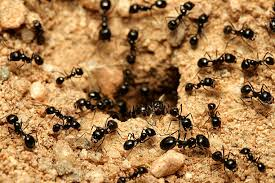

In [4]:
def Add_Nodo(problem, H ,T ) :
  #Mejora:Establecer una funcion de probabilidad para
  # añadir un nuevo nodo dependiendo de los nodos mas cercanos y de las feromonas depositadas
  Nodos = list(problem.get_nodes())
  return random.choice(   list(set(range(1,len(Nodos))) - set(H) )  )


def Incrementa_Feromona(problem, T, H ) :
  #Incrementa segun la calidad de la solución. Añadir una cantidad inversamente proporcional a la distancia total
  for i in range(len(H)-1):
    T[H[i]][H[i+1]] += 1000/distancia_total(H, problem)
  return T

def Evaporar_Feromonas(T ):
  #Evapora 0.3 el valor de la feromona, sin que baje de 1
  #Mejora:Podemos elegir diferentes funciones de evaporación dependiendo de la cantidad actual y de la suma total de feromonas depositadas,...
  T = [[ max(T[i][j] - 0.3 , 1) for i in range(len(Nodos)) ] for j in range(len(Nodos))]
  return T

In [5]:
def hormigas(problem, N) :
  #problem = datos del problema
  #N = Número de agentes(hormigas)

  #Nodos
  Nodos = list(problem.get_nodes())
  #Aristas
  Aristas = list(problem.get_edges())

  #Inicializa las aristas con una cantidad inicial de feromonas:1
  #Mejora: inicializar con valores diferentes dependiendo diferentes criterios
  T = [[ 1 for _ in range(len(Nodos)) ] for _ in range(len(Nodos))]

  #Se generan los agentes(hormigas) que serán estructuras de caminos desde 0
  Hormiga = [[0] for _ in range(N)]

  #Recorre cada agente construyendo la solución
  for h in range(N) :
    #Para cada agente se construye un camino
    for i in range(len(Nodos)-1) :

      #Elige el siguiente nodo
      Nuevo_Nodo = Add_Nodo(problem, Hormiga[h] ,T )
      Hormiga[h].append(Nuevo_Nodo)

    #Incrementa feromonas en esa arista
    T = Incrementa_Feromona(problem, T, Hormiga[h] )
    #print("Feromonas(1)", T)

    #Evapora Feromonas
    T = Evaporar_Feromonas(T)
    #print("Feromonas(2)", T)

    #Seleccionamos el mejor agente
  mejor_solucion = []
  mejor_distancia = 10e100
  for h in range(N) :
    distancia_actual = distancia_total(Hormiga[h], problem)
    if distancia_actual < mejor_distancia:
      mejor_solucion = Hormiga[h]
      mejor_distancia =distancia_actual


  print(mejor_solucion)
  print(mejor_distancia)


hormigas(problem, 1000)

[0, 7, 4, 17, 31, 30, 41, 9, 35, 2, 23, 25, 32, 16, 37, 1, 6, 5, 28, 27, 29, 38, 40, 24, 18, 13, 15, 12, 22, 3, 11, 26, 14, 20, 33, 10, 19, 34, 21, 39, 8, 36]
3918
